In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, roc_auc_score


pd.set_option('display.max_columns', 500)
%matplotlib inline
plt.style.use('ggplot')

In [3]:
data = pd.read_csv('California-House-Price.csv')
data.tail(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20630,-121.32,39.29,11,2640,505.0,1257,445,3.5673,112000,INLAND
20631,-121.40,39.33,15,2655,493.0,1200,432,3.5179,107200,INLAND
20632,-121.45,39.26,15,2319,416.0,1047,385,3.1250,115600,INLAND
20633,-121.53,39.19,27,2080,412.0,1082,382,2.5495,98300,INLAND
20634,-121.56,39.27,28,2332,395.0,1041,344,3.7125,116800,INLAND
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND
20639,-121.24,39.37,16,2785,616.0,1387,530,2.3886,89400,INLAND


In [4]:
data.shape # any method can be used

(20640, 10)

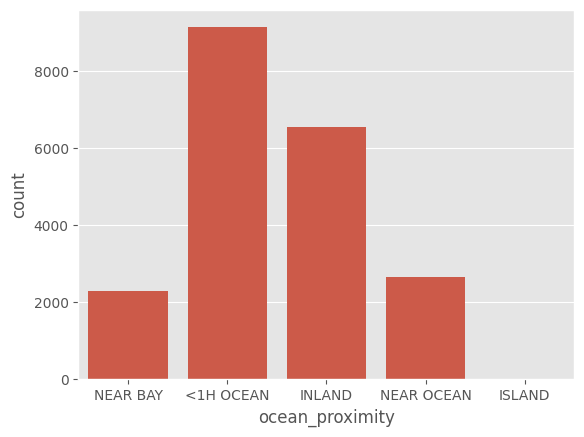

In [6]:
sns.countplot(x='ocean_proximity', data = data)
plt.show()

In [8]:
data = pd.get_dummies(data=data, columns=['ocean_proximity'])
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,False,False,False,True,False
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,False,False,False,True,False
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,False,False,False,True,False
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,False,False,False,True,False
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,False,False,False,True,False


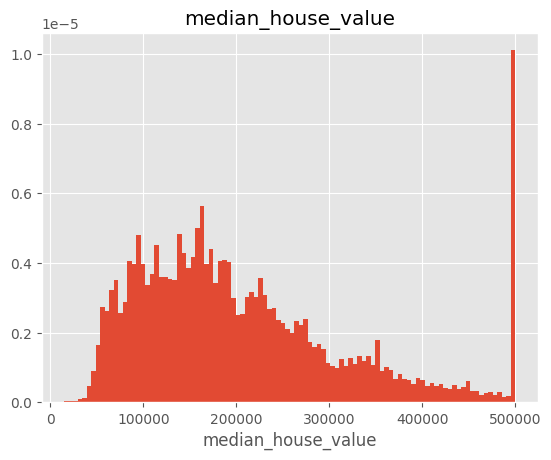

In [9]:
data.median_house_value.hist(bins=100, density=True)
plt.title("median_house_value")
plt.xlabel("median_house_value")
plt.show()

The distribution is right-skewed and has tail, thus, it should use a log transformation

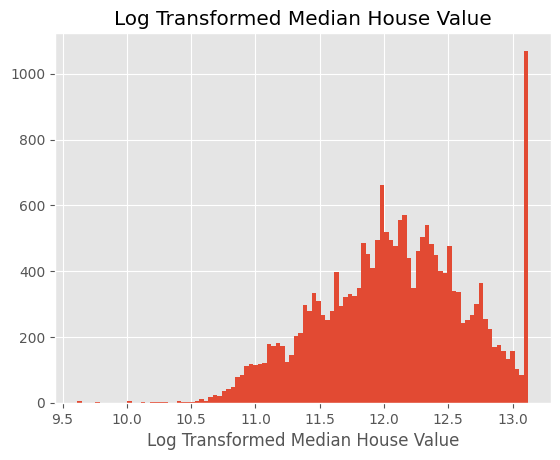

In [12]:
log_value = np.log(data.median_house_value)
plt.hist(log_value, density=False, bins = 100)
plt.title("Log Transformed Median House Value")
plt.xlabel("Log Transformed Median House Value")
plt.show()

In [13]:
data['median_house_value'] = log_value
data.rename(columns={"median_house_value": "log_value"}, inplace=True)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,log_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,13.022764,False,False,False,True,False
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,12.789684,False,False,False,True,False
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,12.771671,False,False,False,True,False
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,12.740517,False,False,False,True,False
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,12.743151,False,False,False,True,False
